In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# For getting the colour map
import matplotlib.cm as cm

#For clustering and creating dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

# For labels of the dendogram plot
import pylab

# for scatter matrix of numerical variables
from pandas.plotting import scatter_matrix

In [2]:
lending_club = pd.read_csv('loan.csv')

/Users/amirisev/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Pandas is complaining about not being able to infer data types. We will set the data types so that pandas is memory efficient while processing the columns. reference: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [ ]:
#todo. Set the datatypes of individual columns

## Data Cleanup loan_status
Since the Current loan statuses cannot be used to determine whether a loan is paid or charged off, <br>
We will remove the loan_status with the value Current. We will save it in a separate dataframe for future analysis

In [154]:
lending_club_current = lending_club.loc[lending_club['loan_status'] == 'Current']
lending_club = lending_club.loc[lending_club['loan_status'] != 'Current']

First I will analyse each row one by one, and start cleaning up the outliers.

In [265]:
# Helper functions.
def do_analysis(dataframe, column_name):
    print(dataframe[column_name].describe(percentiles=np.linspace(0,1,11)))
    print("Number of null values for the column {0} : {1}".format(column_name, dataframe[column_name].isnull().sum()))
    plt.figure(figsize=(10,10))
#    plt.subplot(122)
    plt.subplot(311)
    dataframe[column_name].plot(kind='hist', bins=50)
    plt.subplot(312)
    dataframe[column_name].plot(kind='box')
#    plt.subplot(313)
    dataframe[[column_name, 'loan_status']].boxplot(by='loan_status')


In [185]:
def do_analysis_categorical(dataframe, column_name):
    print(dataframe[column_name].value_counts())
    # Segmented Univariate Analysis
    pivot = pd.pivot_table(lending_club, values = 'policy_code',
                         index = [column_name], columns = ['loan_status'], aggfunc = np.sum, margins=True)
    print(pivot)
    # todo: find a way to find percentages in the pivot table
    #print(pivot[['Charged Off', 'Fully Paid']].div(pivot[[ 'All', 'All']]))
    # Segmented Univariate Analysis
    pd.pivot_table(lending_club, values = 'policy_code', index = [column_name],
               columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

In [191]:
from scipy.stats import ttest_ind
def run_t_test(dataframe, column_name):
    charged_off = dataframe.loc[dataframe['loan_status'] == 'Charged Off']
    fully_paid = dataframe.loc[dataframe['loan_status'] == 'Fully Paid']
    print(ttest_ind(charged_off[column_name], fully_paid[column_name]))
    

## Analysing loan amount

count    38193.000000
mean     10962.411960
std       7266.136171
min        500.000000
0%         500.000000
10%       3000.000000
20%       5000.000000
30.0%     6000.000000
40%       7550.000000
50%       9600.000000
60.0%    11000.000000
70%      13600.000000
80%      16000.000000
90%      21000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
Number of null values for the column loan_amnt : 0


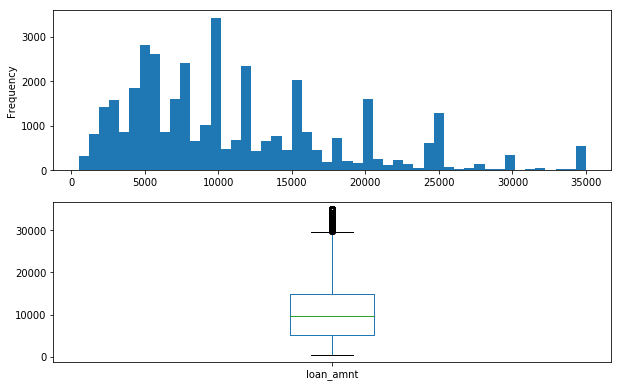

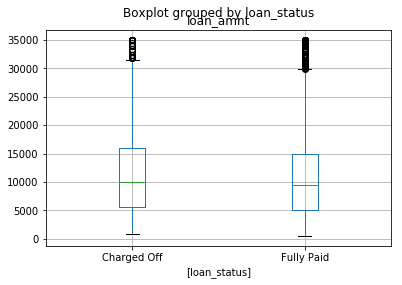

In [266]:
do_analysis(lending_club, 'loan_amnt')

## Insight.
The loan amount has spikes at the round numbers like 5, 000$, 10,000 $, 15, 000$, 20, 000$ 25, 000 $ etc. <br/>
This can be an input to the UX team or the Business Development team to create loan packages at these round numbers.

## Insight.
There is no difference in the means of the loan amount for charged off and fully paid. <br/>
Hence we can conclude that loan amount has no bearing on the loan defaults

In [196]:
run_t_test(lending_club, 'loan_amnt')

Ttest_indResult(statistic=12.047469338306524, pvalue=2.2992195705660277e-33)


## Insight
Plot to see if there is a co-relation between the loan amount and annual income, and see if there are any clusters <br>
 of defaults. We see that the loan amount is co-related to annual income, however there is no pattern or clusters of <br>
defaults <br>
At lower income levels - below 10000 USD and higher loan amounts - above 15, 000 USD, there seems to be a concentration of defaults.

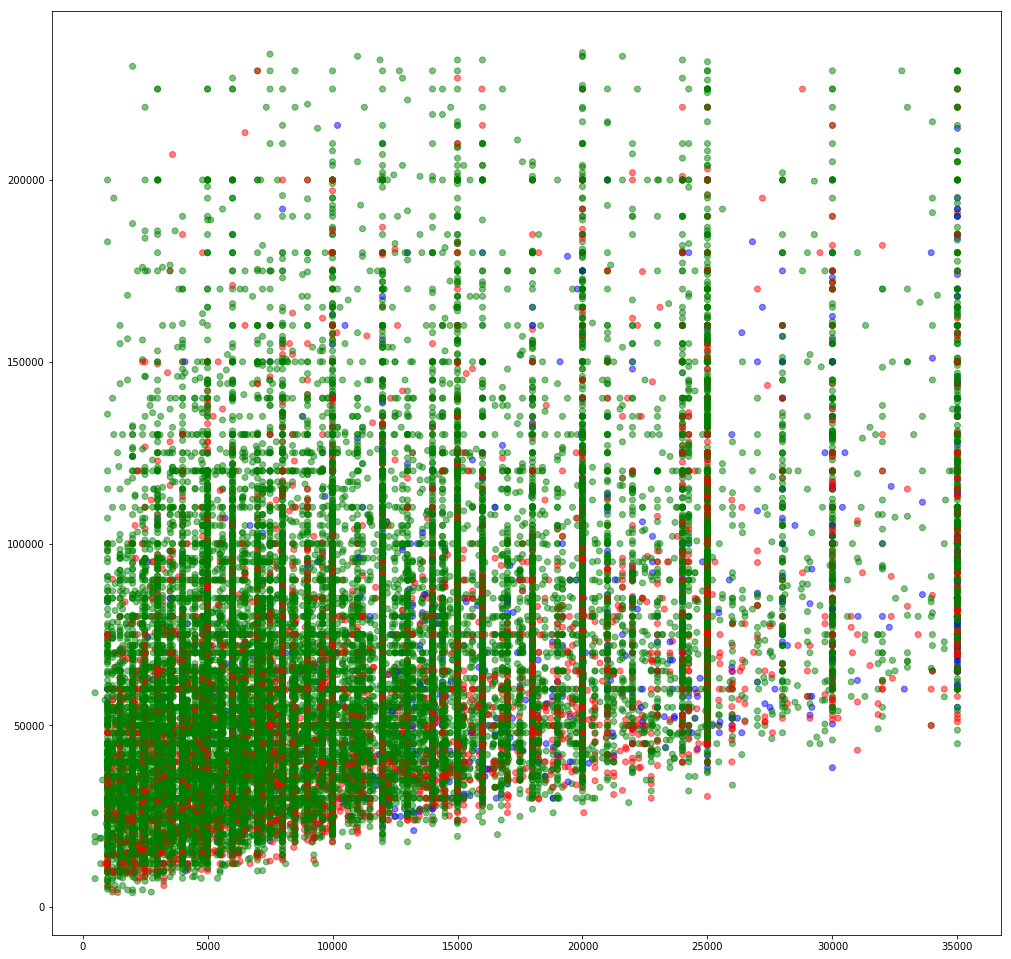

In [112]:

fig, ax = plt.subplots(figsize=(17,17))

colours = {'Fully Paid':'green', 'Charged Off':'red', 'Current':'blue'}
ax.scatter(lending_club['loan_amnt'], lending_club['annual_inc'], c=lending_club['loan_status'].apply(lambda x: colours[x]), alpha=0.5)


## Insight 
The Loan amount is corelated positively with the annual income

In [114]:
lending_club[['annual_inc', 'loan_amnt']].corr()

,annual_inc,loan_amnt
annual_inc,1.000000,0.415993
loan_amnt,0.415993,1.000000


## Analysing the loan_amnt effect on the loan default

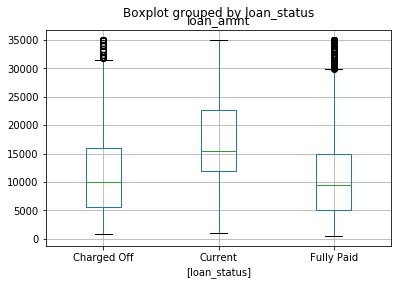

In [126]:
lending_club[['loan_amnt', 'loan_status']].boxplot(by='loan_status')

## Data Cleanup:  We will not remove any row for loan_amnt as all the rows seem valid.

## Analysing the annual_inc (Annual Income) Column

count     38193.000000
mean      65322.485244
std       35171.242586
min        4000.000000
0%         4000.000000
10%       30000.000000
20%       37000.000000
30.0%     44000.000000
40%       50000.000000
50%       58000.000000
60.0%     65000.000000
70%       75000.000000
80%       90000.000000
90%      111000.000000
100%     234996.000000
max      234996.000000
Name: annual_inc, dtype: float64
Number of null values for the column annual_inc : 0


/Users/amirisev/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


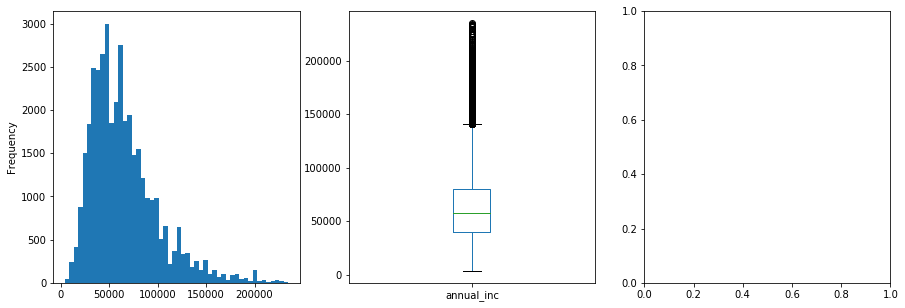

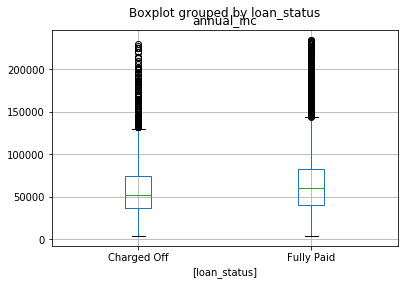

In [193]:
do_analysis(lending_club, 'annual_inc')

# Insight:
The Average annual income for charged off cases is lower than the fully paid cases.

In [192]:
run_t_test(lending_club, 'annual_inc')

Ttest_indResult(statistic=-12.630358135882375, pvalue=1.6993143394170217e-36)


In [15]:
# 5th percentile
lending_club.annual_inc.quantile(0.05)

24000.0

In [22]:
#What percent of values fall below the 5th percentile?
lending_club.loc[lending_club['annual_inc'] < 24000].shape[0] * 100 / lending_club.shape[0]

4.539617795906035

In [19]:
# 95th percentile
lending_club.annual_inc.quantile(0.99)

234999.36

In [21]:
# Percentage of values that fall in above the 99th percentile (i.e top 1 percentile)
lending_club.loc[lending_club['annual_inc'] > 234999].shape[0] * 100/ lending_club.shape[0]

1.0020897852305057

In [17]:
lending_club['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

The spread is between around 40,000 and 82,300. We will drop the outliers top 95 percentile. We will not remove the bottom 5 percentile because the lenders can be from the low income group. Also below the 5th percentile, there are 5% of rows. so we will not remove the bottom 5th percentile.

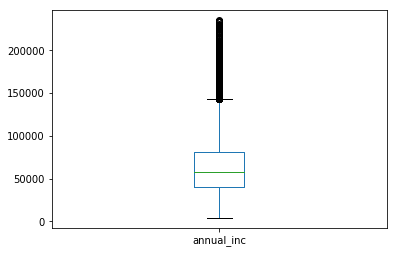

In [25]:
# This is the box plot with the outliers removed.
lending_club.loc[lending_club['annual_inc'] < 234999]['annual_inc'].plot(kind='box')

In [28]:
# Removing the top 1 percentile of outliers
lending_club = lending_club.loc[lending_club['annual_inc'] < 234999]

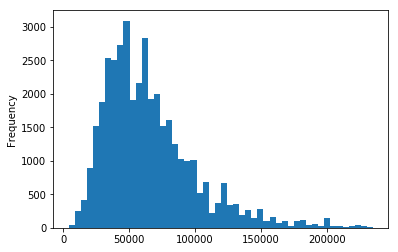

In [30]:
# Understanding the distribution using histogram
lending_club['annual_inc'].plot(kind='hist', bins=50)

In [37]:
#Understanding the distribution through the percentile. 10th percentile is < 1 standard deviation 
#and 80th percentile is on the higher end of the bucket where we can create a cutoff
lending_club['annual_inc'].describe(percentiles=np.linspace(0,1,11))

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
0%         4000.000000
10%       30000.000000
20%       37200.000000
30.0%     44477.800000
40%       50000.000000
50%       58000.000000
60.0%     65000.000000
70%       75000.000000
80%       90000.000000
90%      112000.000000
100%     234996.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [ ]:
# Creating a function to segment customers based on their income levels
# LOW is less than 30, 000, MID is between 30,000 and 90, 000, HIGH is above 90, 000

In [42]:
def get_income_segment(income):
    if(income < 30000):
        return 'LOW'
    if((income >= 30000) & (income < 90000)):
        return 'MID'
    if(income >= 90000):
        return 'HIGH'

In [43]:
#Segment the customers by income level
lending_club['income_level'] = lending_club.apply(lambda row : get_income_segment(row['annual_inc']), axis=1)

In [51]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['income_level'], columns = ['loan_status'], aggfunc = np.sum)

loan_status,Charged Off,Current,Fully Paid
income_level,,,
HIGH,841,281,6808
LOW,700,56,3043
MID,4043,789,22758


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115b9dac8>,
      dtype=object)

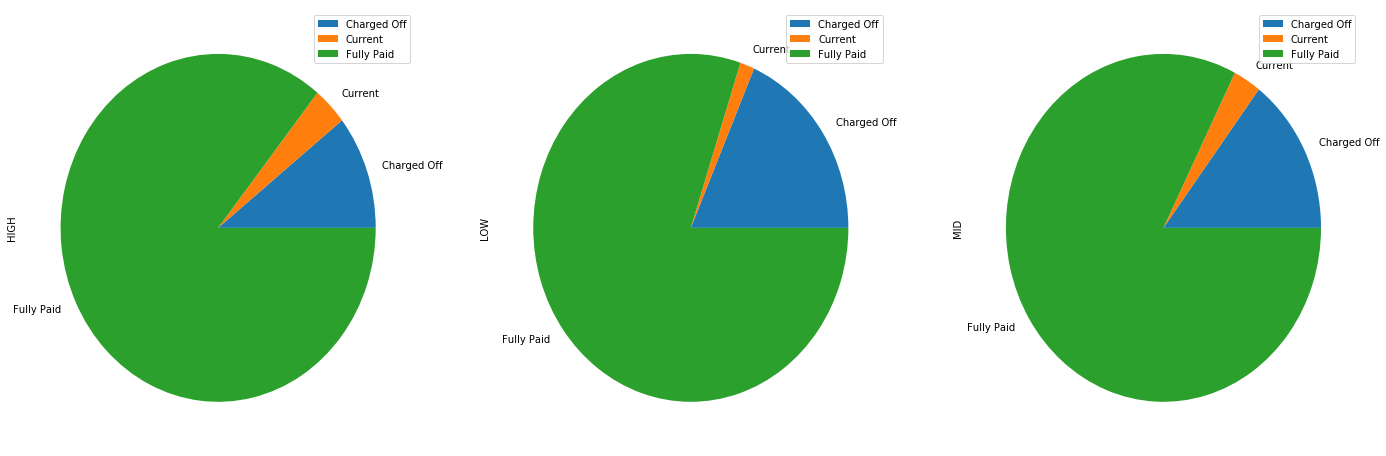

In [60]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['loan_status'], columns = ['income_level'], aggfunc = np.sum).plot(kind='pie', subplots=True, figsize=(24, 8))

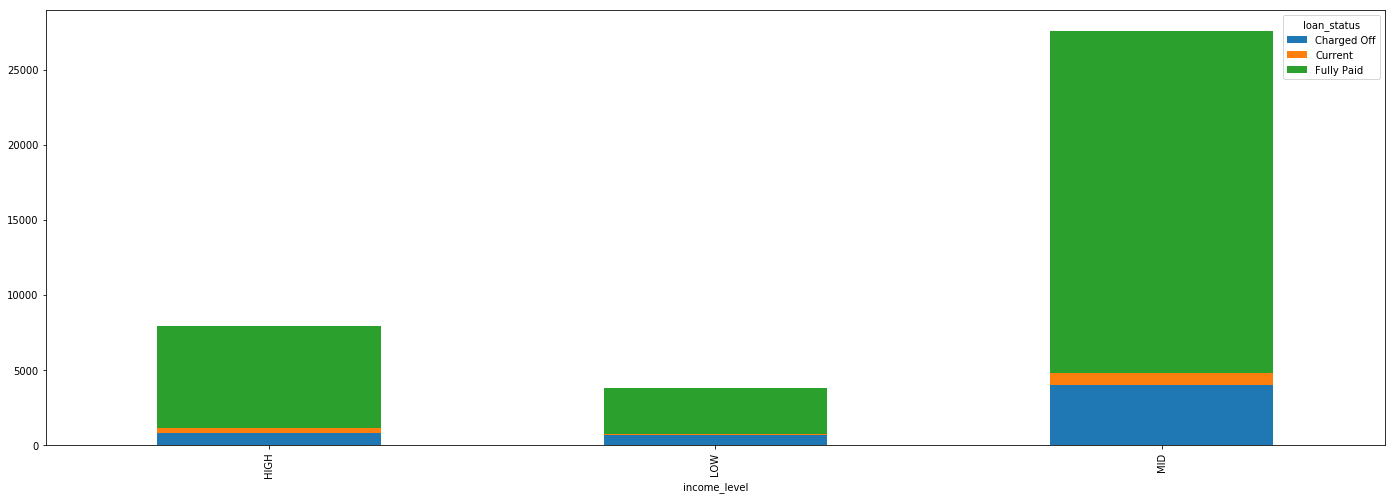

In [124]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['income_level'], columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

## INSIGHT 1: This pivot table gives the percentage of charged off (defaults) in each income segment.
10% : HIGH Income segment have 841/(6808 + 218 + 841) <br/>
14% : MID Income Segment have 4043 / (4043 + 789 + 22758)<br/>
18% : LOW Income Segment has 700 / (700 + 56 + 3043)<br/>

### This shows that the Loan default increases in the lower income segment.

# Analysis of funded_amnt

In [138]:
# Is funded_amnt same as loan amnt. What % of rows where funded amount and loan amount are not same.
lending_club.loc[lending_club['loan_amnt'] != lending_club['funded_amnt']]['funded_amnt'].shape[0]/ lending_club.shape[0]

0.04628805412141713

In [137]:
# corelation between loan amount and funded amount
lending_club[['loan_amnt', 'funded_amnt']].corr()

,loan_amnt,funded_amnt
loan_amnt,1.000000,0.981566
funded_amnt,0.981566,1.000000


In [139]:
# Is the monetary difference more. yes
(lending_club['loan_amnt'] - lending_club['funded_amnt']).sum()

10543700

In [144]:
(lending_club['loan_amnt'] - lending_club['funded_amnt']).median()

0.0

count    38193.000000
mean     10703.310816
std       7010.923199
min        500.000000
0%         500.000000
10%       3000.000000
20%       5000.000000
30.0%     6000.000000
40%       7500.000000
50%       9500.000000
60.0%    10775.000000
70%      13000.000000
80%      15675.000000
90%      20000.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
Number of null values for the column funded_amnt : 0


/Users/amirisev/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


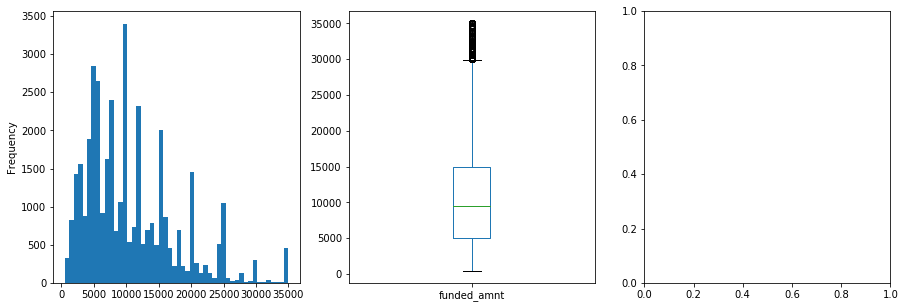

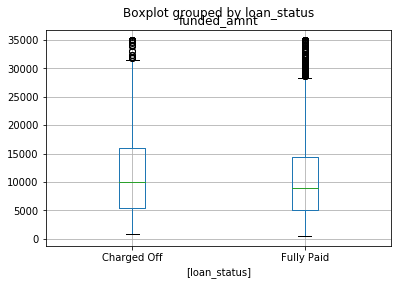

In [197]:
do_analysis(lending_club, 'funded_amnt')

# Insight
Charged off has a higher average funded amount than the fully paid segment <br>
Also, since the loan_amount and funded_amount are highly corelated, and there is not a lot a difference, we can just use the funded_amount column and drop the loan amount column.

In [145]:
# I also want to analyse if the people who ask more, but get less. Is there is corelation between this difference and chargeoff

lending_club['asking_lending_difference'] = lending_club['loan_amnt'] - lending_club['funded_amnt']

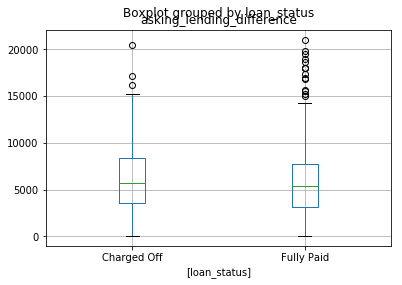

In [198]:
lending_club[['asking_lending_difference', 'loan_status']].loc[lending_club['asking_lending_difference'] > 0].boxplot(by='loan_status')

# Insight
The charged off loans had asked for a higher amount but got lower loan amount.

In [200]:
run_t_test(lending_club, 'funded_amnt')

Ttest_indResult(statistic=11.471886869736167, pvalue=2.04856151803736e-30)


# Analysis of term

 36 months    28820
 60 months     9373
Name: term, dtype: int64
loan_status  Charged Off  Fully Paid    All
term                                       
 36 months          3201       25619  28820
 60 months          2383        6990   9373
All                 5584       32609  38193


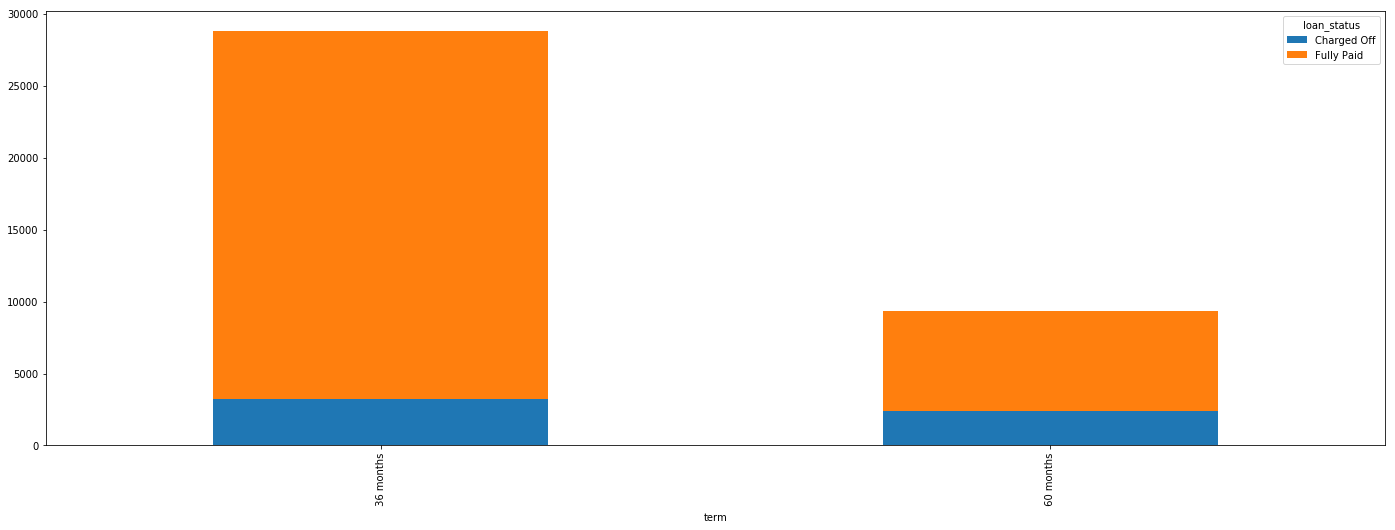

In [187]:
do_analysis_categorical(lending_club, 'term')

## Insight : term
11% of customers with tenure of 36 months default <br>
25.42 % of the customers with tenure of 60 months default <br>
Higher tenure leads to higher default rates.

# Analysis installment

count    38193.000000
mean       319.935974
std        205.943424
min         15.690000
0%          15.690000
10%         98.920000
20%        149.260000
30.0%      185.636000
40%        227.820000
50%        276.300000
60.0%      326.920000
70%        385.070000
80%        475.938000
90%        613.440000
100%      1305.190000
max       1305.190000
Name: installment, dtype: float64
Number of null values for the column installment : 0


/Users/amirisev/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


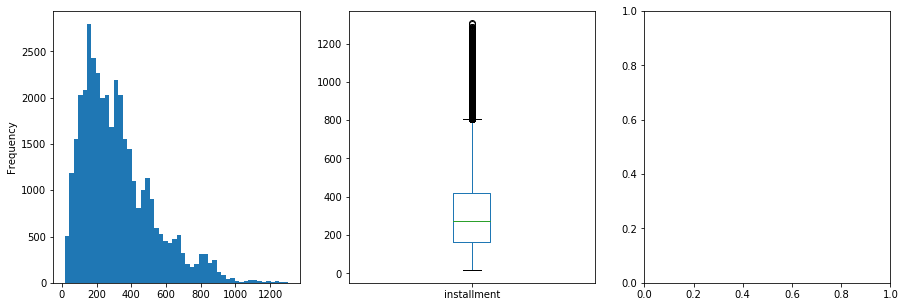

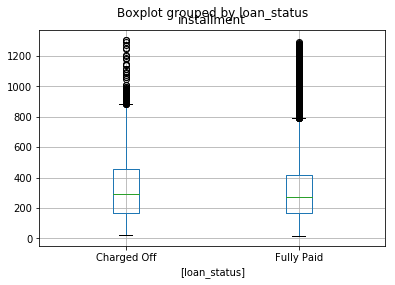

In [189]:
do_analysis(lending_club, 'installment')

## Multivariate analysis using a dendrogram

In [238]:
corr = lending_club[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 
                     'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'annual_inc', 'revol_bal','last_pymnt_amnt',
                     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','dti']].corr()

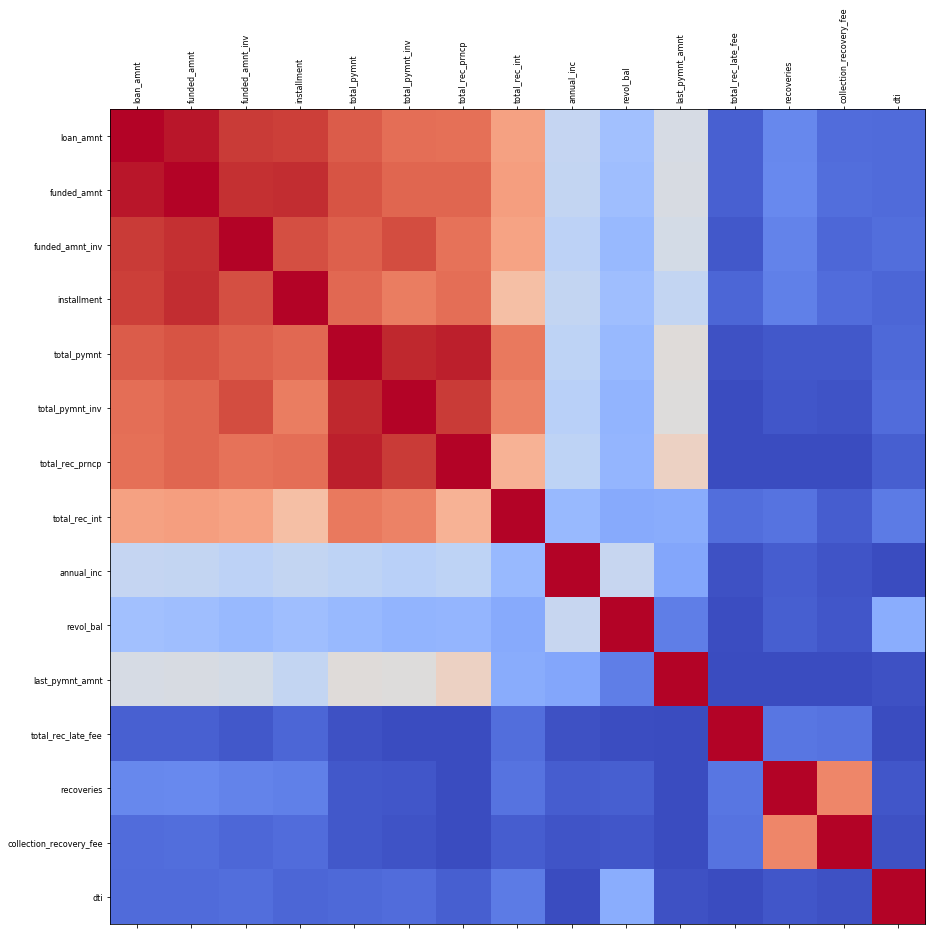

In [247]:
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(corr, cmap=cm.get_cmap('coolwarm'), vmin=0, vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);


In [240]:
Z = linkage(corr, 'average')

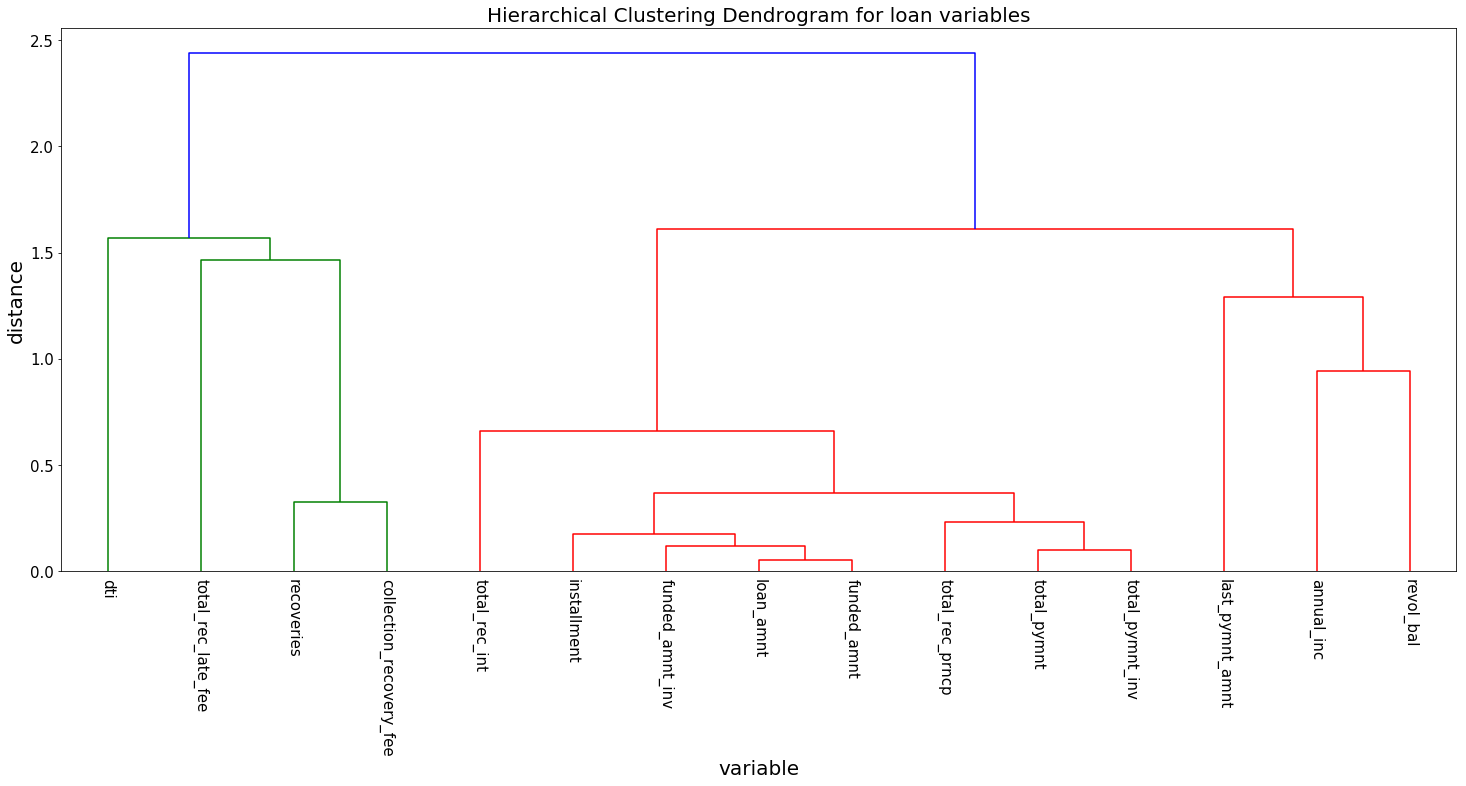

In [241]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for loan variables', fontsize=labelsize)
plt.xlabel('variable', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
#plt.savefig('img/dendogram_'+index+'.png')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15609fcf8>,
      dtype=object)

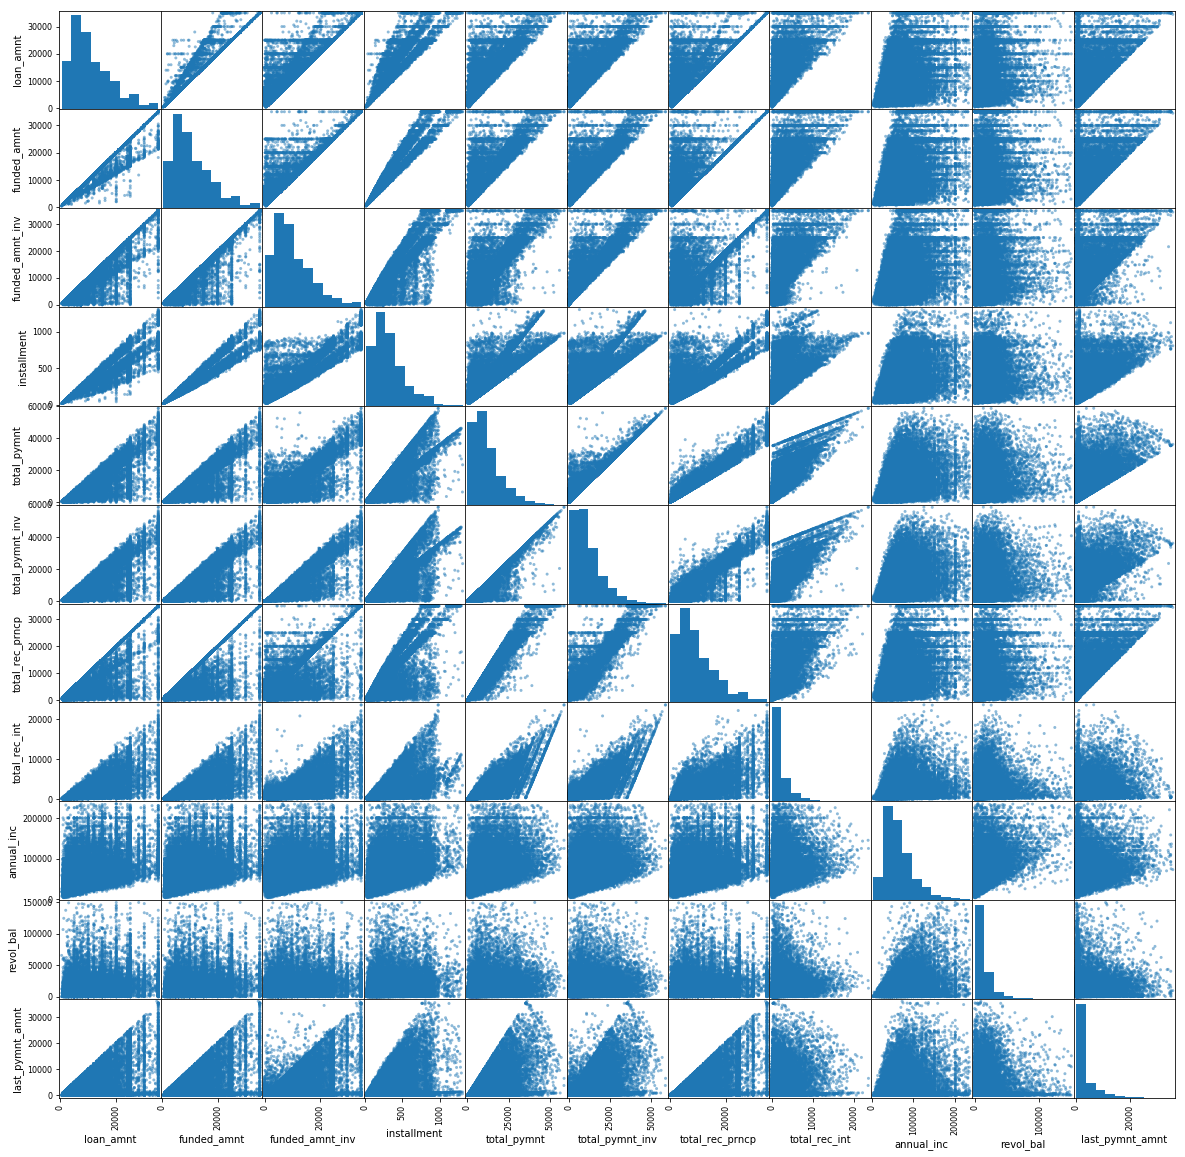

In [254]:
numerical_attributes = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 
                     'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'annual_inc', 'revol_bal','last_pymnt_amnt']
pd.plotting.scatter_matrix(lending_club[numerical_attributes], figsize=(20, 20))